# Problem Statement

We live in a world that is driven by technology and electronic devices as gadgets have become a part of our daily life. It is near impossible to think of a world without smartphones or tablets. Like many kinds of goods or products, used electronic devices have a good demand in our country. In this hackathon, we challenge the data science community to predict the price of used electronic devices based on certain factors.

Given are 6 distinguishing factors that can influence the price of a used device. Your objective as a data scientist is to build a machine learning model that can predict the price of used electronic devices based on the given factors.

Data Description:-
The unzipped folder will have the following files.

Train.csv –  2326 observations. <br>
Test.csv –  997 observations. <br>
Sample Submission – Sample format for the submission. <br>

Target Variable: Price

# Phase1: Model Building On Training Data

# Step1: Read Data

In [1]:
train = pd.read_csv("Train.csv")
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [2]:
train.shape

(2326, 7)

In [3]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'City',
       'State', 'Price'],
      dtype='object')

# Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

## 2.1 Missing Data Analysis 

In [4]:
train.isnull().sum()

Brand                     0
Model_Info                0
Additional_Description    0
Locality                  0
City                      0
State                     0
Price                     0
dtype: int64

## 2.2 Data Type Analysis 

In [5]:
train.dtypes

Brand                      int64
Model_Info                object
Additional_Description    object
Locality                   int64
City                       int64
State                      int64
Price                      int64
dtype: object

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [6]:
train.describe()

,Brand,Locality,City,State,Price
count,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000
mean,1.047291,538.894239,7.294067,3.693465,25562.137145
std,0.396109,333.355186,5.408113,2.194072,21316.854497
min,0.000000,0.000000,0.000000,0.000000,399.000000
25%,1.000000,249.000000,2.000000,2.000000,12000.000000
50%,1.000000,534.000000,8.000000,4.000000,18945.000000
75%,1.000000,814.000000,11.000000,5.000000,30974.250000
max,3.000000,1191.000000,17.000000,8.000000,129998.000000


### 2.3.1 Discrete Variables Plot

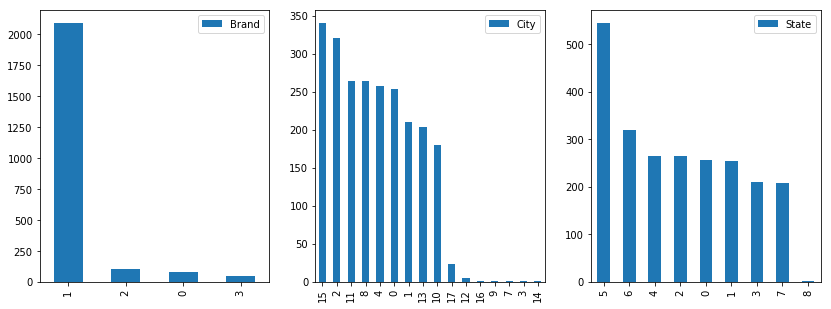

In [9]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
train.Brand.value_counts().plot(kind='bar', label = 'Brand')
plt.legend()

plt.subplot(1,3,2)
train.City.value_counts().plot(kind='bar', label = 'City')
plt.legend()

plt.subplot(1,3,3)
train.State.value_counts().plot(kind='bar', label = 'State')
plt.legend()



### 2.3.5 Target Variable Plot

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


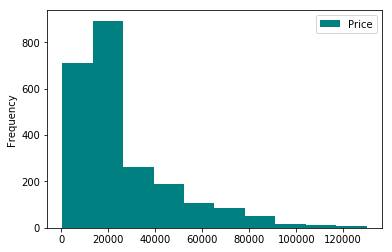

In [16]:
train.Price.plot(kind='hist', colors=['teal'], label="Price")
plt.legend()

# Step3: Feature Engineering

In [40]:
def device_memory_category(x):
    if (x.find("16gb") != -1) or (x.find("16 gb") != -1):
        return 1
    elif(x.find("32gb") != -1) or (x.find("32 gb") != -1):
        return 2
    elif(x.find("64gb") != -1) or (x.find("64 gb") != -1):
        return 3
    elif(x.find("128gb") != -1) or (x.find("128 gb") != -1):
        return 4
    elif(x.find("256gb") != -1) or (x.find("256 gb") != -1):
        return 1
    else:
        return 0
    
def if_iphopne_or_ipad(x):
    if (x.find("iphone") != -1) or (x.find("ipad") != -1):
        return 1
    else:
        return 0
    
def device_condition(x):
    if (x.find("good") != -1) or (x.find("great") != -1) or (x.find("excellent") != -1) or (x.find("new") != -1) \
    or (x.find("mint") != -1):
        return 1
    else:
        return 0
    
def under_warranty(x):
    if (x.find("billbox") != -1) or (x.find("warranty") != -1) or (x.find("boxbill") != -1) or (x.find("box") != -1) \
    or (x.find("bill box") != -1):
        return 1
    else:
        return 0



In [44]:
train["device_memory"] = train["Model_Info"].apply(lambda x: device_memory_category(x))
train["phone_status"] = train["Model_Info"].apply(lambda x: if_iphopne_or_ipad(x))
train["device_condition"] = train["Model_Info"].apply(lambda x: device_condition(x))
train["warranty_status"] = train["Additional_Description"].apply(lambda x: under_warranty(x))

In [47]:
train.drop("warranty-status", axis=1, inplace=True)

In [48]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,device_memory,phone_status,device_condition,warranty_status
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,3,0,0,0
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,0,0,1,0
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,1,0,1,0
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500,3,0,0,1
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499,0,0,1,1


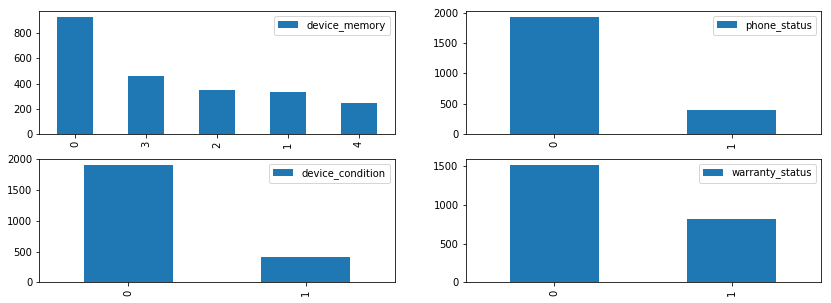

In [49]:
plt.figure(figsize=(14,5))

plt.subplot(2,2,1)
train.device_memory.value_counts().plot(kind='bar', label = 'device_memory')
plt.legend()

plt.subplot(2,2,2)
train.phone_status.value_counts().plot(kind='bar', label = 'phone_status')
plt.legend()

plt.subplot(2,2,3)
train.device_condition.value_counts().plot(kind='bar', label = 'device_condition')
plt.legend()

plt.subplot(2,2,4)
train.warranty_status.value_counts().plot(kind='bar', label = 'warranty_status')
plt.legend()


In [90]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,device_memory,phone_status,device_condition,warranty_status
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,3,0,0,0
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,0,0,1,0
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,1,0,1,0
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500,3,0,0,1
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499,0,0,1,1


In [100]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'City',
       'State', 'Price', 'device_memory', 'phone_status', 'device_condition',
       'warranty_status'],
      dtype='object')

## 3.1 Dummy Variable Creation

In [103]:
train = pd.get_dummies(data=train, columns=['City','State','device_memory'], 
               prefix=['City', 'State', 'Device_memory'], 
               drop_first=True)

In [154]:
train['City_5'] = 0
train['City_6'] = 0
train['City_18'] = 0 
train['City_19'] = 0

In [155]:
train.shape

(2326, 39)

In [156]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'Price',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8',
       'City_9', 'City_10', 'City_11', 'City_12', 'City_13', 'City_14',
       'City_15', 'City_16', 'City_17', 'State_1', 'State_2', 'State_3',
       'State_4', 'State_5', 'State_6', 'State_7', 'State_8',
       'Device_memory_1', 'Device_memory_2', 'Device_memory_3',
       'Device_memory_4', 'City_18', 'City_19'],
      dtype='object')

In [157]:
train = train[['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'Price',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9', 'City_10',
       'City_11', 'City_12', 'City_13', 'City_14', 'City_15', 'City_16',
       'City_17', 'City_18', 'City_19', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'Device_memory_1', 'Device_memory_2',
       'Device_memory_3', 'Device_memory_4']]

# Step4: Separating X and Y

## 4.1 Re-setting Index Before Splitting

In [158]:
train.reset_index(drop=True, inplace=True)

## 4.2 Split Data

In [159]:
x = train.drop(['Price', 'Model_Info', 'Additional_Description'], axis=1)
y = train['Price']

In [160]:
x_copy = x.copy()

# Step5: Creating Train and Test Set In Ratio 80:20

In [161]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Step6: Model Building

In [55]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


## 6.2 Importing and Model Fitting

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### 6.2.1 Averaged base models class

In [62]:
#Define a cross validation strategy

#We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [60]:
#Base models

#LASSO Regression :
#This model may be very sensitive to outliers. So we need to made it more robust on them. 
#For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net Regression : again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge Regression :

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting Regression : With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [109]:
#Base models scores
#Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100066036247.28519, tolerance: 69421837.59904732
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48129340819.77545, tolerance: 70984584.91366124
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107879578016.8403, tolerance: 70972812.01120624
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O


Lasso score: 20163.6531 (730.4955)



C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292966775631.3916, tolerance: 69421837.59904732
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296725193411.76776, tolerance: 70984584.91366124
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296483416710.8982, tolerance: 70972812.01120624
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

ElasticNet score: 20163.0262 (727.2152)

Kernel Ridge score: 19982.0485 (713.3016)

Gradient Boosting score: 20001.3161 (686.3856)



## Stacking models
#### Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

### Averaged base models class

In [67]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

Averaged base models score

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix

In [162]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292966775631.3916, tolerance: 69421837.59904732
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100066036247.28519, tolerance: 69421837.59904732
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296725193411.76776, tolerance: 70984584.91366124
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: 

 Averaged base models score: 19638.3114 (727.1603)



C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114938834733.531, tolerance: 69231133.14185697
  positive)


In [163]:
X_train.isnull().sum()

Brand               0
Locality            0
phone_status        0
device_condition    0
warranty_status     0
City_1              0
City_2              0
City_3              0
City_4              0
City_5              0
City_6              0
City_7              0
City_8              0
City_9              0
City_10             0
City_11             0
City_12             0
City_13             0
City_14             0
City_15             0
City_16             0
City_17             0
City_18             0
City_19             0
State_1             0
State_2             0
State_3             0
State_4             0
State_5             0
State_6             0
State_7             0
State_8             0
Device_memory_1     0
Device_memory_2     0
Device_memory_3     0
Device_memory_4     0
dtype: int64

In [164]:
model = averaged_models.fit(X_train, y_train)
predictions = model.predict(X_test)

C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366198125845.50806, tolerance: 87468291.80268447
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122861375804.35052, tolerance: 87468291.80268447
  positive)


In [165]:
mean_squared_error(predictions, y_test)

354506862.5778474

In [166]:
#On Full Data

model_full = averaged_models.fit(x, y)

C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449844754641.1994, tolerance: 105649926.41492508
  positive)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162904843794.05103, tolerance: 105649926.41492508
  positive)


# Phase2: Applying Model On Test Data

In [137]:
test = pd.read_csv('Test.csv')

test.shape

(997, 6)

In [138]:
test.head(5)

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,11,4
1,1,slightly used excellent condition name0 5 sale,101008700 1010030600 1010034300 10100192200 1...,762,8,2
2,1,name0 sx ios12 top letast model bill call,1010017300 delivery,60,13,5
3,1,name87 name0 x 64gb going lowest 41900,phone 1010023400 64 gb excellent condition sale,640,15,5
4,1,name0 5s proper condition one handedly used,full kit available 10100248300 condition 4gb ...,816,2,6


In [139]:
test["device_memory"] = test["Model_Info"].apply(lambda x: device_memory_category(x))
test["phone_status"] = test["Model_Info"].apply(lambda x: if_iphopne_or_ipad(x))
test["device_condition"] = test["Model_Info"].apply(lambda x: device_condition(x))
test["warranty_status"] = test["Additional_Description"].apply(lambda x: under_warranty(x))

In [140]:
test = pd.get_dummies(data=test, columns=['City','State','device_memory'], 
               prefix=['City', 'State', 'Device_memory'], 
               drop_first=True)

In [167]:
test.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_4', 'City_5', 'City_6', 'City_8', 'City_10', 'City_11',
       'City_12', 'City_13', 'City_15', 'City_17', 'City_18', 'City_19',
       'State_1', 'State_2', 'State_3', 'State_4', 'State_5', 'State_6',
       'State_7', 'Device_memory_1', 'Device_memory_2', 'Device_memory_3',
       'Device_memory_4'],
      dtype='object')

In [168]:
test['City_3'] = 0
test['City_7'] = 0
test['City_9'] = 0
test['City_14'] = 0
test['City_16'] = 0
test['State_8'] = 0

In [170]:
test_for_prediction = test[['Brand', 'Locality',
       'phone_status', 'device_condition', 'warranty_status', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9', 'City_10',
       'City_11', 'City_12', 'City_13', 'City_14', 'City_15', 'City_16',
       'City_17', 'City_18', 'City_19', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'Device_memory_1', 'Device_memory_2',
       'Device_memory_3', 'Device_memory_4']]

In [171]:
test_for_prediction.head()

,Brand,Locality,phone_status,device_condition,warranty_status,City_1,City_2,City_3,City_4,City_5,...,State_3,State_4,State_5,State_6,State_7,State_8,Device_memory_1,Device_memory_2,Device_memory_3,Device_memory_4
0,1,570,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,762,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,60,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,640,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,816,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [119]:
def predict_file(model, model_instance, test_data):
    file_name = "Final_output_prediction_from_" + model + ".xlsx"
    predictions  = model_instance.predict(test_data)
    df_prediction_var = pd.DataFrame(predictions, columns=["Price"])
    df_prediction_var.to_excel(file_name)
    print("{} created.".format(file_name))

In [174]:
predict_file("stacked_model", model_full, test_for_prediction)

Final_output_prediction_from_stacked_model.xlsx created.
